In [ ]:
# concatentate all patches in a single list
all_patches, all_labels, all_masks = [], [], []



for i in range(30):
    sample = np.random.randint(0, len(dataset))
    print(sample)
    kk =  dataset[sample] 
    print(kk[0].shape, kk[1].shape, kk[2].shape)



4776
(4, 512, 512) (4, 512, 512) (4, 512, 512)
6716
(4, 512, 512) (4, 512, 512) (4, 512, 512)
5474
(4, 512, 512) (4, 512, 512) (4, 512, 512)
2003
(4, 512, 512) (4, 512, 512) (4, 512, 512)
5961
(4, 512, 512) (4, 512, 512) (4, 512, 512)
2938
(4, 512, 512) (4, 512, 512) (4, 512, 512)
1807
(4, 512, 512) (4, 512, 512) (4, 512, 512)
1353
(4, 512, 512) (4, 512, 512) (4, 512, 512)
2546
(4, 512, 512) (4, 512, 512) (4, 512, 512)
361
(4, 512, 512) (4, 512, 512) (4, 512, 512)
3388
(4, 512, 512) (4, 512, 512) (4, 512, 512)
1033
(4, 512, 512) (4, 512, 512) (4, 512, 512)
2434
(4, 512, 512) (4, 512, 512) (4, 512, 512)
4288
(4, 512, 512) (4, 512, 512) (4, 512, 512)
2417
(4, 512, 512) (4, 512, 512) (4, 512, 512)
4278
(4, 512, 512) (4, 512, 512) (4, 512, 512)
2255
(4, 512, 512) (4, 512, 512) (4, 512, 512)
1739
(4, 512, 512) (4, 512, 512) (4, 512, 512)
255
(4, 512, 512) (4, 512, 512) (4, 512, 512)
5801
(4, 512, 512) (4, 512, 512) (4, 512, 512)
557
(4, 512, 512) (4, 512, 512) (4, 512, 512)
1473
(4, 512, 51

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')
import numpy as np

from lib.utils import show_mask_image
import matplotlib.pyplot as plt

from data.ddsm_dataset import DDSM_Patch_Dataset

split_csv = '../resources/ddsm/DDSM_train.csv'

ddsm_annotations = '../resources/ddsm/ddsm_annotations.csv'
root_dir = '/home/alalbiol/Data/mamo/DDSM_png_1152x896'
transform_generator = None

SyntaxError: closing parenthesis ']' does not match opening parenthesis '{' on line 596 (ddsm_dataset.py, line 601)

In [ ]:
dataset = DDSM_Patch_Dataset(split_csv, ddsm_annotations, root_dir, 
                             return_mask= True, patch_sampler = None)

Number of annotations:  4664
Number of annotations after filtering split:  3997
Found 2780 normal images
Number of annotations after adding normals:  6777
Number of annotations after filtering OTHER_BENIGN (18 in total)  6759


In [ ]:
set(dataset.get_all_targets())

{'CALCIFICATION_BENIGN',
 'CALCIFICATION_MALIGNANT',
 'MASS_BENIGN',
 'MASS_MALIGNANT',
 'NORMAL'}

In [ ]:
# count instances per class
from collections import Counter
Counter(dataset.get_all_targets())


Counter({'NORMAL': 2780,
         'CALCIFICATION_BENIGN': 1201,
         'MASS_BENIGN': 1070,
         'MASS_MALIGNANT': 998,
         'CALCIFICATION_MALIGNANT': 710})

3979


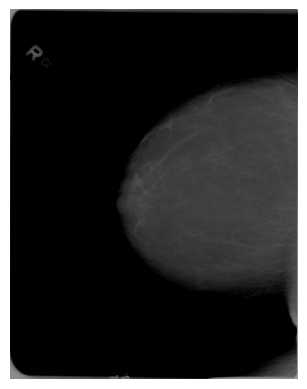

In [ ]:
targets = dataset.get_all_targets()

#find the index of the first instance of a class
target = 'NORMAL'
index = np.where(targets==target)[0][0]
print(index)

image, abn, mask = dataset[index]

show_mask_image(image, mask)

0


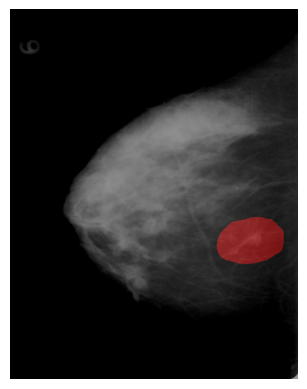

In [ ]:
targets = dataset.get_all_targets()

#find the index of the first instance of a class
target = 'MASS_MALIGNANT'
index = np.where(targets==target)[0][0]
print(index)

image, abn, mask = dataset[index]

show_mask_image(image, mask)

# Patch sampler

## Positive patches

In [ ]:
from data.ddsm_dataset import PatchSampler, RandomAffineTransform, IdentityTransform

affine_transform = RandomAffineTransform()
#affine_transform = IdentityTransform()


patch_sampler  = PatchSampler(512, affine_transform=affine_transform,
                             n_positive_crops = 1, 
                             n_hard_negative_crop=0,
                             n_blob_crops=0,
                             n_random_crops=0)

dataset = DDSM_Patch_Dataset(split_csv, ddsm_annotations, root_dir, 
                             return_mask= True, patch_sampler = patch_sampler)

Number of annotations:  4664
Number of annotations after filtering split:  3997
Found 2780 normal images
Number of annotations after adding normals:  6777
Number of annotations after filtering OTHER_BENIGN (18 in total)  6759


['MASS_MALIGNANT']


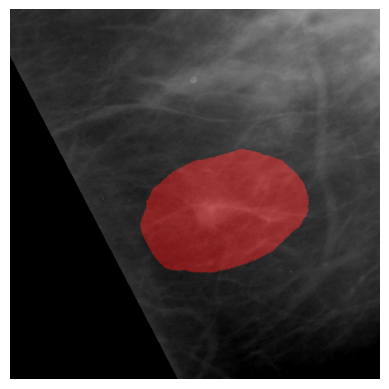

In [ ]:
image_patches, labels, mask_patches = dataset[0]

print(labels)
show_mask_image(image_patches[0], mask_patches[0])

## Negative patches at blobs


In [ ]:


affine_transform = RandomAffineTransform()
#affine_transform = IdentityTransform()


patch_sampler = PatchSampler(512, affine_transform=affine_transform,
                             n_positive_crops = 0, 
                             n_hard_negative_crop=0,
                             n_blob_crops=1,
                             n_random_crops=0)

dataset = DDSM_Patch_Dataset(split_csv, ddsm_annotations, root_dir, 
                             return_mask= True, patch_sampler = patch_sampler)

Number of annotations:  4664
Number of annotations after filtering split:  3997
Found 2780 normal images
Number of annotations after adding normals:  6777
Number of annotations after filtering OTHER_BENIGN (18 in total)  6759


['NORMAL']


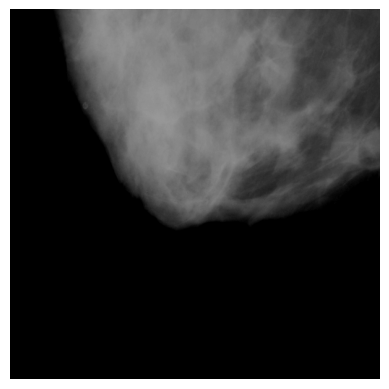

In [ ]:
image_patches, labels, mask_patches = dataset[0]

print(labels)
show_mask_image(image_patches[0], mask_patches[0])

## Hard negatives

Number of annotations:  4664
Number of annotations after filtering split:  3997
Found 2780 normal images
Number of annotations after adding normals:  6777
Number of annotations after filtering OTHER_BENIGN (18 in total)  6759
['NORMAL']


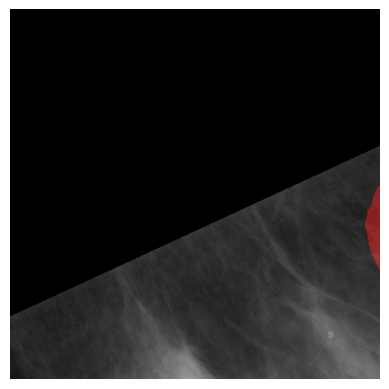

In [ ]:
affine_transform = RandomAffineTransform()
#affine_transform = IdentityTransform()


patch_sampler = PatchSampler(512, affine_transform=affine_transform,
                             n_positive_crops = 0, 
                             n_hard_negative_crop=1,
                             n_blob_crops=0,
                             n_random_crops=0)

dataset = DDSM_Patch_Dataset(split_csv, ddsm_annotations, root_dir, 
                             return_mask= True, patch_sampler = patch_sampler)

image_patches, labels, mask_patches = dataset[0]

print(labels)
show_mask_image(image_patches[0], mask_patches[0])

# Random crops

Number of annotations:  4664
Number of annotations after filtering split:  3997
Found 2780 normal images
Number of annotations after adding normals:  6777
Number of annotations after filtering OTHER_BENIGN (18 in total)  6759
['NORMAL']


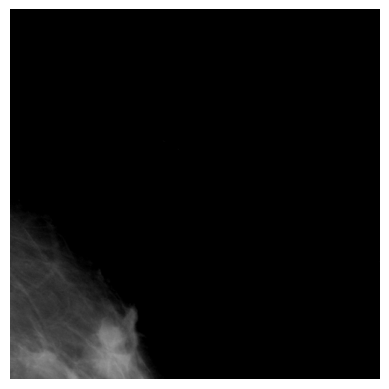

In [ ]:
affine_transform = RandomAffineTransform()
#affine_transform = IdentityTransform()


patch_sampler = PatchSampler(512, affine_transform=affine_transform,
                             n_positive_crops = 0, 
                             n_hard_negative_crop=0,
                             n_blob_crops=0,
                             n_random_crops=1)

dataset = DDSM_Patch_Dataset(split_csv, ddsm_annotations, root_dir, 
                             return_mask= True, patch_sampler = patch_sampler)

image_patches, labels, mask_patches = dataset[0]

print(labels)
show_mask_image(image_patches[0], mask_patches[0])

## Several patches

Number of annotations:  4664
Number of annotations after filtering split:  3997
Found 2780 normal images
Number of annotations after adding normals:  6777
Number of annotations after filtering OTHER_BENIGN (18 in total)  6759
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


dtype('uint8')

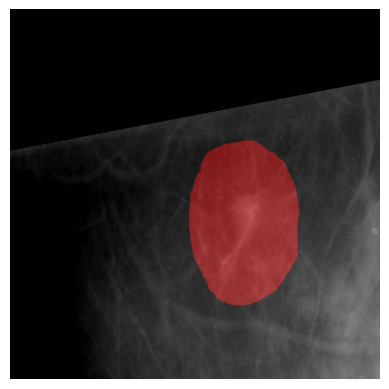

In [ ]:
affine_transform = RandomAffineTransform()
#affine_transform = IdentityTransform()


patch_sampler = PatchSampler(512, affine_transform=affine_transform,
                             n_positive_crops = 1, 
                             n_hard_negative_crop=1,
                             n_blob_crops=1,
                             n_random_crops=1)

dataset = DDSM_Patch_Dataset(split_csv, ddsm_annotations, root_dir, 
                             return_mask= True, patch_sampler = patch_sampler)

image_patches, labels, mask_patches = dataset[0]

print(labels)
show_mask_image(image_patches[0], mask_patches[0])

image_patches[0].dtype

# Data loader

In [ ]:
from data.ddsm_dataset import get_dataloader


dl = get_dataloader(split_csv, ddsm_annotations, root_dir, return_mask= True)

Number of annotations:  4664
Number of annotations after filtering split:  3997
Found 2780 normal images
Number of annotations after adding normals:  6777
Number of annotations after filtering OTHER_BENIGN (18 in total)  6759


In [ ]:
# get a batch
for i, batch in enumerate(dl):
    print(batch[0].shape, batch[1].shape, batch[2].shape)
    if i>10:
        break


torch.Size([128, 1, 512, 512]) torch.Size([128]) torch.Size([128, 512, 512])
torch.Size([128, 1, 512, 512]) torch.Size([128]) torch.Size([128, 512, 512])
torch.Size([128, 1, 512, 512]) torch.Size([128]) torch.Size([128, 512, 512])
torch.Size([128, 1, 512, 512]) torch.Size([128]) torch.Size([128, 512, 512])
torch.Size([128, 1, 512, 512]) torch.Size([128]) torch.Size([128, 512, 512])
torch.Size([128, 1, 512, 512]) torch.Size([128]) torch.Size([128, 512, 512])
torch.Size([128, 1, 512, 512]) torch.Size([128]) torch.Size([128, 512, 512])
torch.Size([128, 1, 512, 512]) torch.Size([128]) torch.Size([128, 512, 512])
torch.Size([128, 1, 512, 512]) torch.Size([128]) torch.Size([128, 512, 512])
torch.Size([128, 1, 512, 512]) torch.Size([128]) torch.Size([128, 512, 512])
torch.Size([128, 1, 512, 512]) torch.Size([128]) torch.Size([128, 512, 512])
torch.Size([128, 1, 512, 512]) torch.Size([128]) torch.Size([128, 512, 512])


tensor(2)


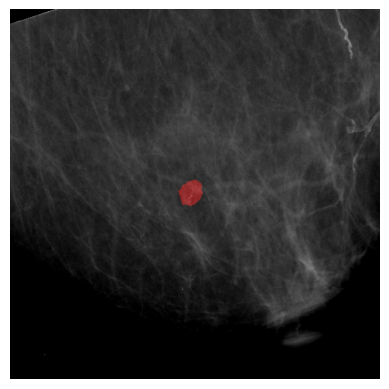

In [ ]:
import torch

k = torch.where(batch[1])[0][0] # selecte patch with positive label
show_mask_image(batch[0][k][0], batch[2][k])
print(batch[1][k])


In [ ]:
dl = get_dataloader(split_csv, ddsm_annotations, root_dir, return_mask= False)

# get a batch
for i, batch in enumerate(dl):
    print(batch[0].shape,  batch[1].shape)
    if i>2:
        break


Number of annotations:  4664
Number of annotations after filtering split:  3997
Found 2780 normal images
Number of annotations after adding normals:  6777
Number of annotations after filtering OTHER_BENIGN (18 in total)  6759
Patch images dtype:  uint8
Patch images dtype:  uint8
Patch images dtype:  uint8
torch.Size([128, 1, 512, 512]) torch.Size([128])
torch.Size([128, 1, 512, 512]) torch.Size([128])
torch.Size([128, 1, 512, 512]) torch.Size([128])
Patch images dtype:  uint8
torch.Size([128, 1, 512, 512]) torch.Size([128])
Patch images dtype:  uint8
Patch images dtype:  uint8
Patch images dtype:  uint8
Patch images dtype:  uint8


In [ ]:
print(batch[0][0].dtype)
print(batch[1][0].max())

torch.float32
tensor(1)


# Patch eval dataset 

In [67]:
from data.ddsm_dataset import DDSM_patch_eval

root_dir = '/home/alalbiol/Data/mamo/DDSM_eval_patches/eval_patches_224'

eval_dataset = DDSM_patch_eval(root_dir)

print(len(eval_dataset))

2001


In [69]:
image, target, mask = eval_dataset[1000]

print(image.shape, target)
print(image.dtype)
print(image.max())

torch.Size([1, 224, 224]) 2
torch.float32
tensor(0.6980)


In [66]:
targets = np.where(np.array(eval_dataset.targets)==4)
print(eval_dataset.samples[targets[0][0]])


('/home/alalbiol/Data/mamo/DDSM_eval_patches/eval_patches_224/malignant_calc/A_1002_1.RIGHT_CC_CALCIFICATION_MALIGNANT_mask_0_0000_img.png', 4)


In [63]:
print(len(eval_dataset.targets))
print(len(eval_dataset.samples))

2001
2001


In [ ]:
       mapping_names = {'background': 0,
            'benign_mass': 1,
            'benign_calc': 2,
            'malignant_mass': 3,
            'malignant_calc': 4,
        }

[('/home/alalbiol/Data/mamo/DDSM_eval_patches/eval_patches_224/background/A_1002_1.RIGHT_CC_CALCIFICATION_MALIGNANT_mask_0_0000_img.png', 0), ('/home/alalbiol/Data/mamo/DDSM_eval_patches/eval_patches_224/background/A_1002_1.RIGHT_CC_CALCIFICATION_MALIGNANT_mask_0_0000_mask.png', 0), ('/home/alalbiol/Data/mamo/DDSM_eval_patches/eval_patches_224/background/A_1002_1.RIGHT_MLO_CALCIFICATION_MALIGNANT_mask_0_0000_img.png', 0), ('/home/alalbiol/Data/mamo/DDSM_eval_patches/eval_patches_224/background/A_1002_1.RIGHT_MLO_CALCIFICATION_MALIGNANT_mask_0_0000_mask.png', 0), ('/home/alalbiol/Data/mamo/DDSM_eval_patches/eval_patches_224/background/A_1027_1.LEFT_MLO_MASS_MALIGNANT_mask_0_0000_img.png', 0), ('/home/alalbiol/Data/mamo/DDSM_eval_patches/eval_patches_224/background/A_1027_1.LEFT_MLO_MASS_MALIGNANT_mask_0_0000_mask.png', 0), ('/home/alalbiol/Data/mamo/DDSM_eval_patches/eval_patches_224/background/A_1032_1.LEFT_CC_CALCIFICATION_MALIGNANT_mask_0_0000_img.png', 0), ('/home/alalbiol/Data/mamo

In [40]:
samples, targets = zip(*[(sample, target) for sample, target in zip(eval_dataset.samples, eval_dataset.targets) if "_img.png" in sample[0] ] )
samples = list(samples)
targets = list(targets)

print(len(samples))
print(samples[0:10])
print(targets[0:10])

2001
[('/home/alalbiol/Data/mamo/DDSM_eval_patches/eval_patches_224/background/A_1002_1.RIGHT_CC_CALCIFICATION_MALIGNANT_mask_0_0000_img.png', 0), ('/home/alalbiol/Data/mamo/DDSM_eval_patches/eval_patches_224/background/A_1002_1.RIGHT_MLO_CALCIFICATION_MALIGNANT_mask_0_0000_img.png', 0), ('/home/alalbiol/Data/mamo/DDSM_eval_patches/eval_patches_224/background/A_1027_1.LEFT_MLO_MASS_MALIGNANT_mask_0_0000_img.png', 0), ('/home/alalbiol/Data/mamo/DDSM_eval_patches/eval_patches_224/background/A_1032_1.LEFT_CC_CALCIFICATION_MALIGNANT_mask_0_0000_img.png', 0), ('/home/alalbiol/Data/mamo/DDSM_eval_patches/eval_patches_224/background/A_1032_1.LEFT_MLO_CALCIFICATION_MALIGNANT_mask_0_0000_img.png', 0), ('/home/alalbiol/Data/mamo/DDSM_eval_patches/eval_patches_224/background/A_1036_1.LEFT_CC_MASS_MALIGNANT_mask_0_0000_img.png', 0), ('/home/alalbiol/Data/mamo/DDSM_eval_patches/eval_patches_224/background/A_1036_1.LEFT_MLO_MASS_MALIGNANT_mask_0_0000_img.png', 0), ('/home/alalbiol/Data/mamo/DDSM_eva